# LearnX Sales Forecasting 

## Problem Statement:
LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on

Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.

Sales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on

Competition in the market for each course
Course Type (Course/Program/Degree)
Holiday Information for each day
User Traffic on Course Page for each day
Your task is to predict the course sales for each course in the test set for the next 60 days

## Data Dictionary:

### Train (Historical Sales Data)


* **Variable	            Definition**
* **ID:**	                Unique Identifier for a row
* **Day_No:**	            Day Number
* **Course_ID:**	        Unique ID for a course
* **Course_Domain:**      Course Domain (Development, Finance etc.)
* **Course_Type:**	    Course/Program/Degree
* **Short_Promotion:**    Whether Short Term Promotion is Live
* **Public_Holiday:**	    Regional/Public Holiday
* **Long_Promotion:**	    Whether Long Term Promotion is Live for the course
* **User_Traffic:**	    Number of customers landing on the course page
* **Competition_Metric:**	A metric defining the strength of competition 
* **Sales:**	            (Target) Total Course Sales

### Hypothesis Generation
* Do courses from Business tends to sell more than other domains?
* Do people like to opt short courses over programs and degrees?
* Do courses on short promotion sell more?
* Do courses on long promotion sell more?
* Do on public holidays the couses sell more?
* Does high user traffic means higher sales?
* Does lower competition metric mean higher sales?

### Importing Libraries

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Importing train and test data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Train Data

In [5]:
#Head of the train data 
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [32]:
#Number of rows and columns
print('Number of columns in train data:', train.shape[1])
print('Number of rows in train data:', train.shape[0])

Number of columns in train data: 11
Number of rows in train data: 512087


In [33]:
#datatype of train variables 
train.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

In [34]:
#Duplicates in train data
train.drop('Sales', axis=1).duplicated().sum()

0

**No duplicates** in train data.

In [35]:
#Null values in train data 
train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

**Competition_Metric** has 1764 null values.

In [40]:
#Checking precentage of null values in Competition_Metric 
print('Percent of null values in Competition_metric',
      train['Competition_Metric'].isnull().sum()/train.shape[0]*100)

Percent of null values in Competition_metric 0.34447271655011746


**To Check:** Does the missing values signifies that there is no competition available?

#### Test Data

In [41]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


* We don't have 2 columns Sales(Target) and User_Traffic in the test data.

In [43]:
#Number of rows and columns 
print('The number of columns in test data are:', test.shape[1])
print('The number of rows in test data are:', test.shape[0])

The number of columns in test data are: 9
The number of rows in test data are: 36000


In [45]:
#Checking for duplicates in test data 
test.duplicated().sum()

0

**No duplicates** in test data.

In [46]:
#Checking for null values in test data 
test.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

* Only **Competition_Metric** has null values(120 nulls).

## Univariate Analysis(Categorical Variables)

In [75]:
def UVA_Cat(data, column, rot=0):
    """
    Function to plot countplot and pie chart for categorical variables.
    
    """
    for j, i in enumerate(column):
        
        #plt.subplot(2,1, j+1)
        
        # Setting the figure size
        plt.figure(figsize=(10,3), dpi=100)
    
    
        # ploting the barplot
        plt.subplot(1,2,1)
        g=sns.countplot(x=i, data= data)
        plt.title('Barplot for {}'.format(i), fontsize=14)
        plt.xticks(rotation=rot)
        #plt.rc('xtick',labelsize=8)
        plt.tight_layout()
        
        #ploting the pie chart 
        plt.subplot(1,2,2)
        plt.axis('equal')
        plt.pie(x= data[i].value_counts(), labels= data[i].value_counts().index, autopct='%0.1f%%', shadow=True)
        plt.title('Pie chart for {}'.format(i), fontsize=14)
        plt.tight_layout()
        plt.show()

### 1. ID

In [67]:
print('Number of unique values in ID:', train['ID'].nunique())
print('Number of rows in the data:', train.shape[0])

Number of unique values in ID: 512087
Number of rows in the data: 512087


* **Observation:**
* Number of unique ids is exactly equal to the number of rows we have in the train data.
* id is just a unique number given to each user.
* id will not be useful for our analysis and later for modeling. 

### 2. Course_Domain & 3. Course_Type

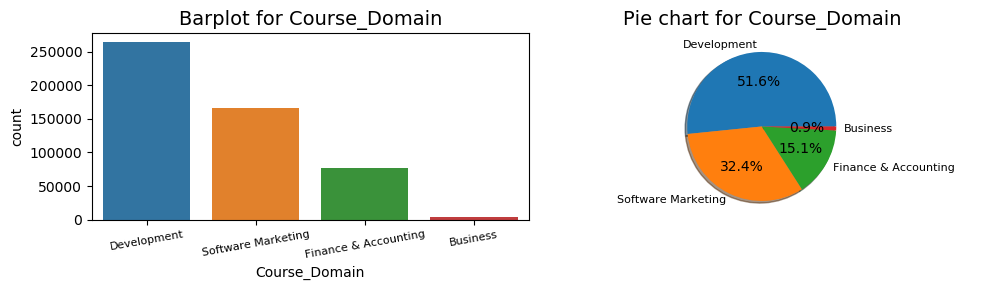

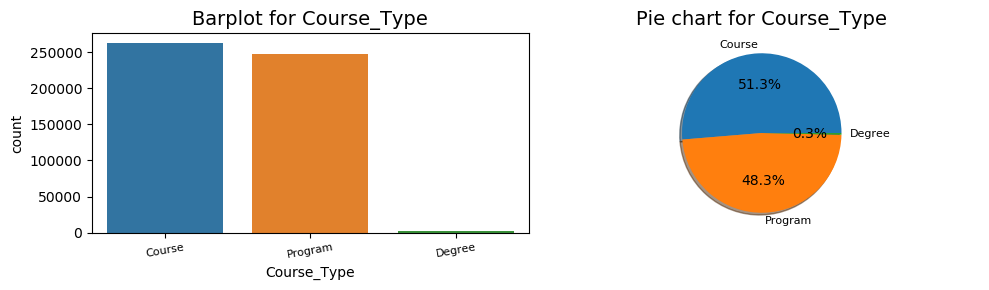

In [78]:
UVA_Cat(train, ['Course_Domain', 'Course_Type'], rot=10)

#### Observation:
* For Course_Domain:

### 4. Short_Promotion, 5. Long_Promotion, & 6. Public_Holiday

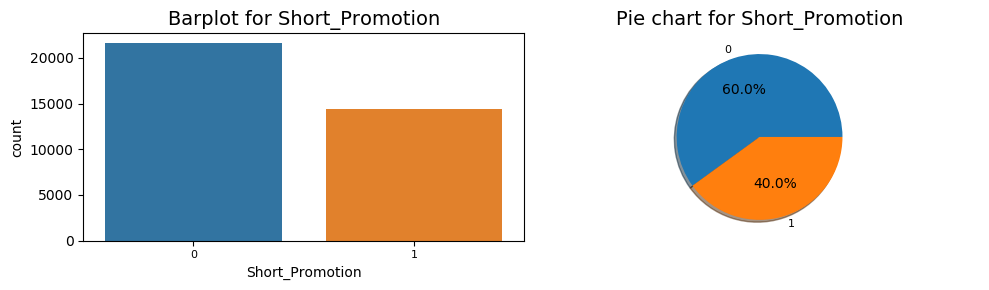

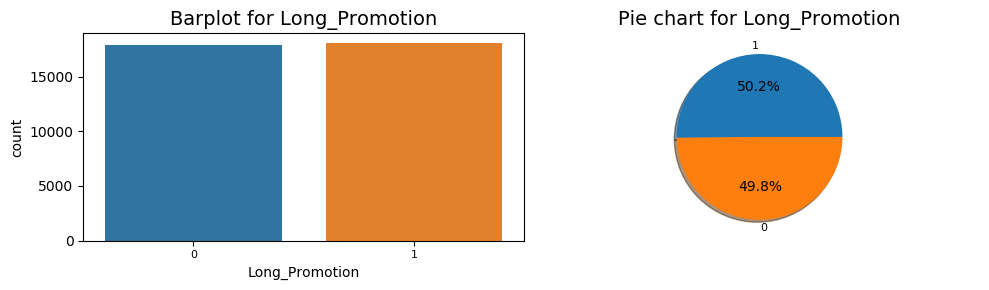

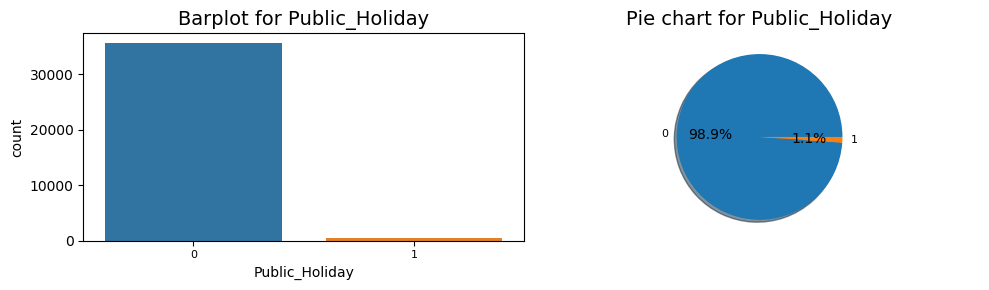

In [90]:
UVA_Cat(test, ['Short_Promotion', 'Long_Promotion', 'Public_Holiday'])

## Univariate Analysis(Continious Variables)

In [47]:
def UVA_Cont(data1, var, include_outlier=True):
    
    """
    Function for univariate analysis of continiuous variables.
    Plots Kdeplot and Boxplot for given continiuous variable. 
    It also takes in argument of wheater to include the outliers while ploting the graphs or not.
    By default it plots graphs with outliers.
    """
    data = data1.copy()
    
    if include_outlier == False:
        
        #Calculating quantiles 
        quant25 = data[var].quantile(0.25)
        quant75 = data[var].quantile(0.75)
        IQR     = quant75 - quant25
        
        # Fitlering data(removing outliers)
        data[var] = data[var][(data[var] < (quant75+ 1.5*IQR)) & (data[var] > (quant25- 1.5*IQR))]
    
    
    #Calculating descriptive statistics 
    mini    = data[var].min()
    maxi    = data[var].max()
    rang    = mini - maxi
    mean    = data[var].mean()
    med     = data[var].median()
    std_    = data[var].std()
    skew    = data[var].skew()
    kurt    = data[var].kurtosis()
    quant25 = data[var].quantile(0.25)
    quant75 = data[var].quantile(0.75)
    IQR     = quant75 - quant25
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)
    
    #Calculating the points of standerd daviation 
    points = mean-std_, mean+std_
    
    # Calculating Number of Outliers
    outlier_high = len(data[var][data[var]>whis_high])
    outlier_low = len(data[var][data[var]<whis_low])
    

    #Ploting kdeplot for continious variable 
    plt.figure(figsize=(18,8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax0 = plt.subplot(gs[0])
    
    sns.kdeplot(data[var],shade=True)
    sns.lineplot(points,[0,0],color='black',label='std_dev')
    sns.scatterplot([mini,maxi],[0,0],color='red',label='min\max')
    sns.scatterplot(mean,[0],color='blue',label='mean')
    sns.scatterplot(med,[0],color='green',label='median')
    plt.xlabel("{}".format(var),fontsize=(14))
    plt.ylabel('density',fontsize=(14))
    plt.tight_layout()
    plt.title('\tstd_dev= {}; \tkurtosis= {}; \tskew= {};\n\tmean= {}; \tmedian= {}; \trange = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                               round(kurt,2),
                                                                                                 round(skew,2),
                                                                                                 round(mean,2),
                                                                                                 round(med,2),
                                                                                                 (round(mini,2),round(maxi,2),round(rang,2))),fontsize=14)
    plt.tight_layout()
        
    #Ploting boxplot for continious variable
    ax1 = plt.subplot(gs[1])
    sns.boxplot(data[var], orient="v")
    plt.title('\tIQR = {};\tOutlier (low/high) = {};\n\t2nd,3rd  quartile = {};'.format(round(IQR,2),
                                                                                            (outlier_low,outlier_high),
                                                                                            (round(quant25,2),round(quant75,2))), fontsize=14)
    plt.ylabel("{}".format(var),fontsize=(14))
    plt.tight_layout()
        

In [106]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

### 7. Day_No

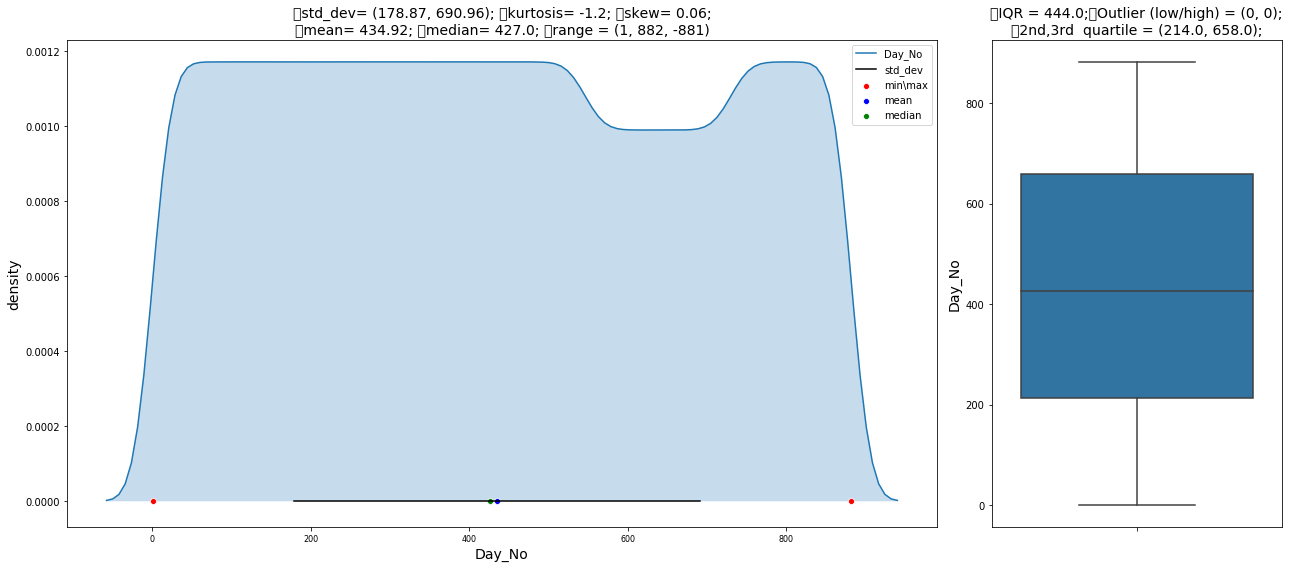

In [109]:
UVA_Cont(train, 'Day_No')

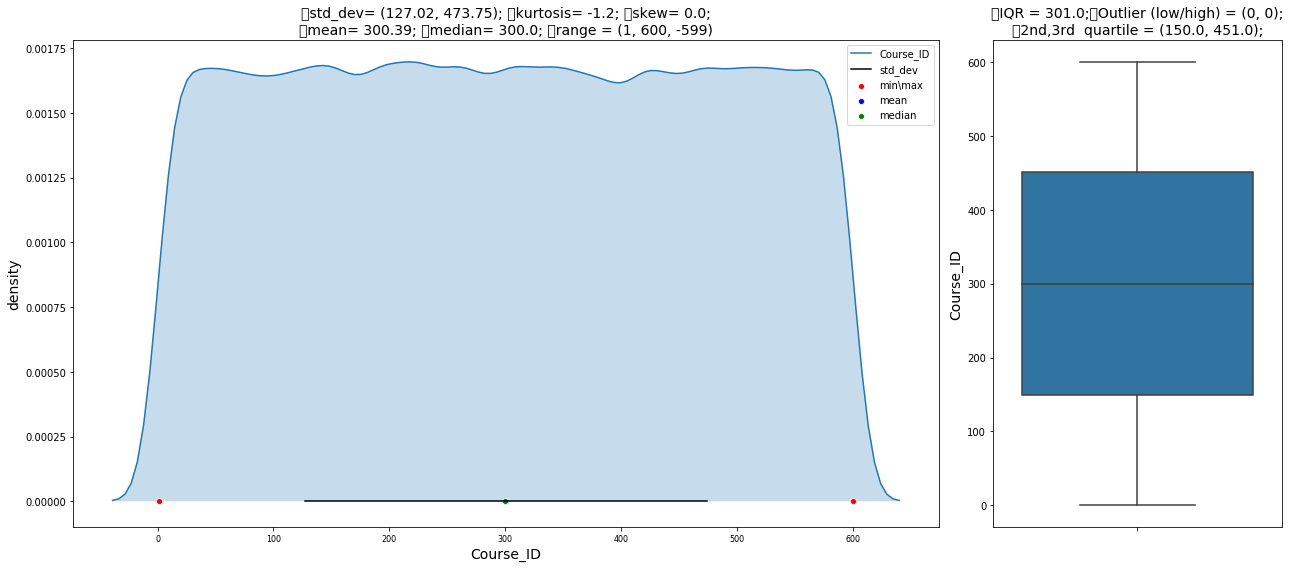

In [110]:
UVA_Cont(train, 'Course_ID')

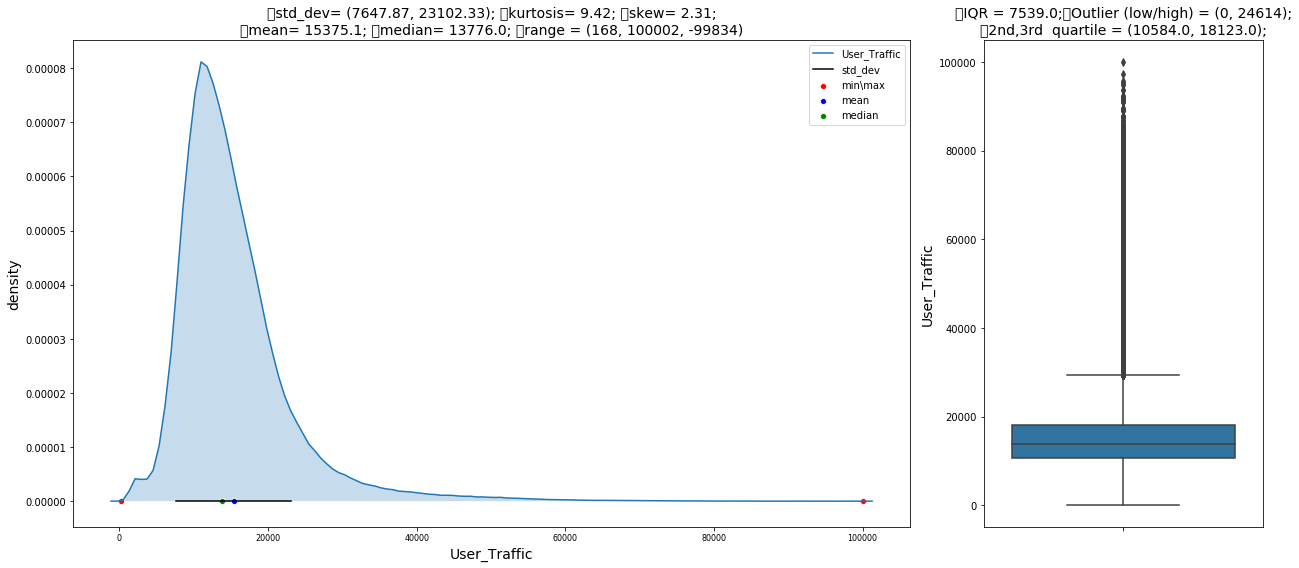

In [111]:
UVA_Cont(train, 'User_Traffic')

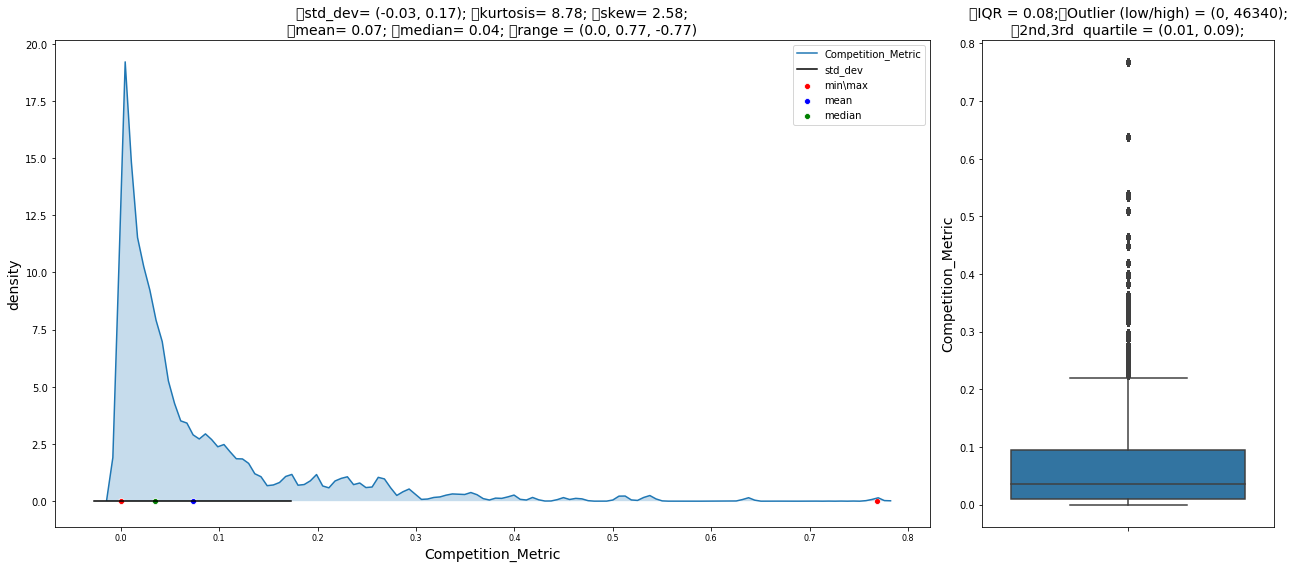

In [112]:
UVA_Cont(train,'Competition_Metric')